In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# exploratory data analysis

## general dataset info

In [2]:
main_filename = '/content/drive/MyDrive/ai4all/kaggle_sp500_data/all_stocks_5yr.csv' # mounted drive, imported through drive
df = pd.read_csv(main_filename)
df.head(50)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [4]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


## find nulls


In [5]:
df.isna().sum()

,0
date,0
open,11
high,8
low,8
close,0
volume,0
Name,0


## column uniques and ranges

In [6]:
cols = df.columns
for i in cols:
  print("describe for " + i)
  print(df[i].describe())
  print("\n")

describe for date
count         619040
unique          1259
top       2018-01-09
freq             505
Name: date, dtype: object


describe for open
count    619029.000000
mean         83.023334
std          97.378769
min           1.620000
25%          40.220000
50%          62.590000
75%          94.370000
max        2044.000000
Name: open, dtype: float64


describe for high
count    619032.000000
mean         83.778311
std          98.207519
min           1.690000
25%          40.620000
50%          63.150000
75%          95.180000
max        2067.990000
Name: high, dtype: float64


describe for low
count    619032.000000
mean         82.256096
std          96.507421
min           1.500000
25%          39.830000
50%          62.020000
75%          93.540000
max        2035.110000
Name: low, dtype: float64


describe for close
count    619040.000000
mean         83.043763
std          97.389748
min           1.590000
25%          40.245000
50%          62.620000
75%          94.410000

In [7]:
df["Name"].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [8]:
df['date'].min(), df['date'].max()

('2013-02-08', '2018-02-07')

In [9]:
df['Name'].value_counts()

,count
Name,
ZTS,1259
AAL,1259
AAPL,1259
AAP,1259
ABBV,1259
...,...
DXC,215
BHGE,152
BHF,143


In [10]:
print("total stocks:", df['Name'].nunique())
print("date range:", df['date'].min(), "to", df['date'].max())
print(df['Name'].value_counts().head(10))  # Stocks with most data

total stocks: 505
date range: 2013-02-08 to 2018-02-07
Name
ZTS     1259
AAL     1259
AAPL    1259
AAP     1259
ABBV    1259
ABC     1259
ABT     1259
ACN     1259
ADBE    1259
WM      1259
Name: count, dtype: int64


## visualizations


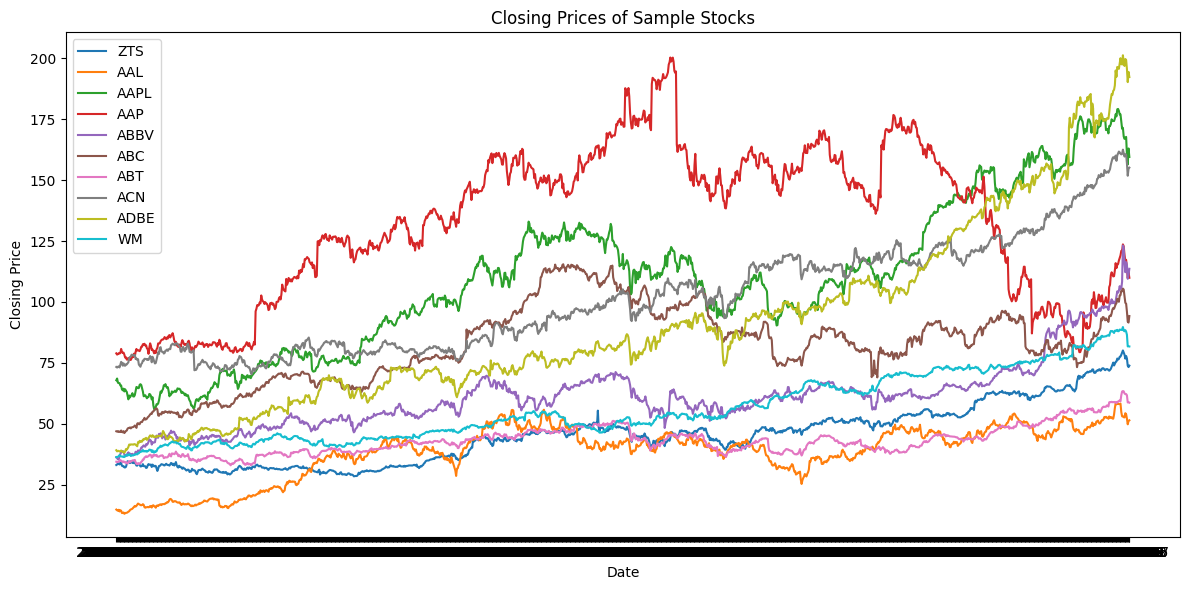

In [11]:
# see pattern
sample = list(df['Name'].value_counts().head(10).index) # change head value to see more companies on the below graph
plt.figure(figsize=(12, 6))

for stock in sample:
    subset = df[df['Name'] == stock]
    plt.plot(subset['date'], subset['close'], label=stock)

plt.title("Closing Prices of Sample Stocks")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.tight_layout()
plt.show()

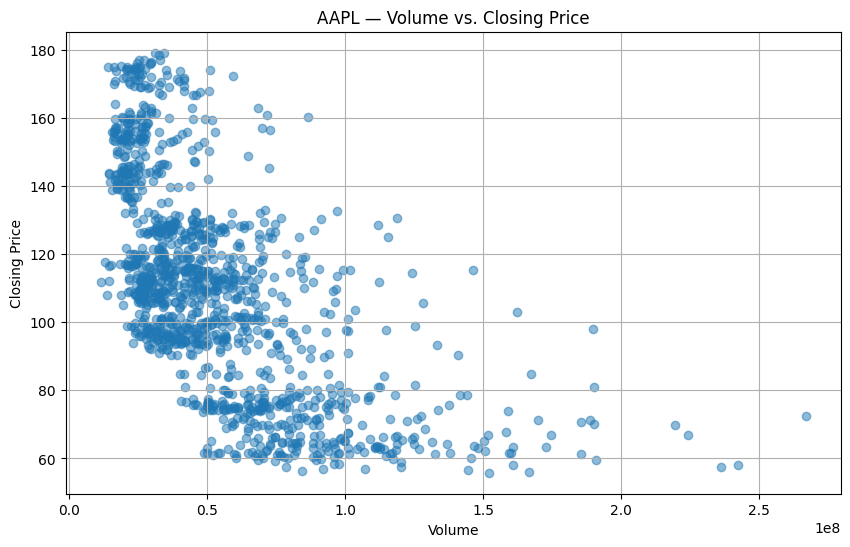

In [12]:
# price VS volume
stock = 'AAPL'
subset = df[df['Name'] == stock].copy()

plt.figure(figsize=(10, 6))
plt.scatter(subset['volume'], subset['close'], alpha=0.5)
plt.title(f"{stock} — Volume vs. Closing Price")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

In [13]:
df['date'] = pd.to_datetime(df['date'])

<Axes: title={'center': 'Average Close Price by Month'}, xlabel='month'>

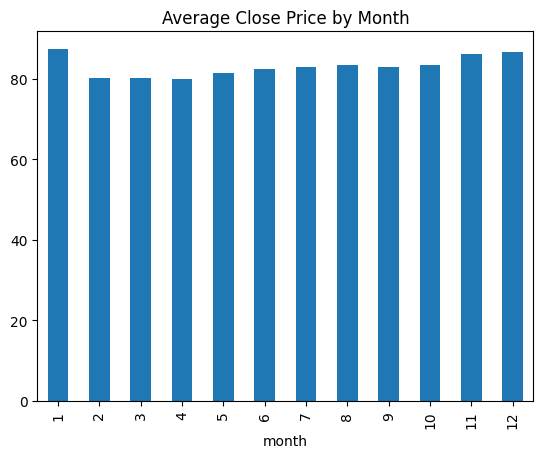

In [14]:
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

monthly_avg = df.groupby(['month'])['close'].mean()
monthly_avg.plot(kind='bar', title='Average Close Price by Month')

## most volatile or stable stocks

In [15]:
stock_summary = df.groupby('Name')['close'].agg(['mean', 'std', 'min', 'max'])
stock_summary['volatility'] = stock_summary['std'] / stock_summary['mean']
stock_summary.sort_values('volatility', ascending=False).head(10)

,mean,std,min,max,volatility
Name,,,,,
NVDA,56.369368,59.624642,12.1260,246.85,1.057749
AMD,5.601863,3.971779,1.6200,15.20,0.709010
CHK,13.681326,9.296515,1.5900,31.30,0.679504
ALGN,83.664518,53.713227,30.1300,283.97,0.642007
DISCA,43.860434,24.191738,16.2800,90.46,0.551562
AVGO,130.745677,71.416222,31.2600,284.62,0.546222
NFLX,94.906152,50.716019,23.2943,284.59,0.534381
DISCK,41.268041,21.950500,15.2700,84.10,0.531901
EA,61.615535,30.649018,16.9100,128.18,0.497424
